# Snapchat Political Ads
This project uses political ads data from Snapchat, a popular social media app. Interesting questions to consider include:
- What are the most prevalent organizations, advertisers, and ballot candidates in the data? Do you recognize any?
- What are the characteristics of ads with a large reach, i.e., many views? What may a campaign consider when maximizing an ad's reach?
- What are the characteristics of ads with a smaller reach, i.e., less views? Aside from funding constraints, why might a campaign want to produce an ad with a smaller but more targeted reach?
- What are the characteristics of the most expensive ads? If a campaign is limited on advertising funds, what type of ad may the campaign consider?
- What groups or regions are targeted frequently? (For example, for single-gender campaigns, are men or women targeted more frequently?) What groups or regions are targeted less frequently? Why? Does this depend on the type of campaign?
- Have the characteristics of ads changed over time (e.g. over the past year)?
- When is the most common local time of day for an ad's start date? What about the most common day of week? (Make sure to account for time zones for both questions.)

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.snap.com/en-US/political-ads/). Download both the 2018 CSV and the 2019 CSV. 

The CSVs have the same filename; rename the CSVs as needed.

Note that the CSVs have the exact same columns and the exact same data dictionaries (`readme.txt`).

### Cleaning and EDA
- Concatenate the 2018 CSV and the 2019 CSV into one DataFrame so that we have data from both years.
- Clean the data.
    - Convert `StartDate` and `EndDate` into datetime. Make sure the datetimes are in the correct time zone. You can use whatever timezone (e.g. UTC) you want as long as you are consistent. However, if you want to answer a question like "When is the most common local time of day for an ad's start date," you will need to convert timezones as needed. See Hint 2 below for more information.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: What is the "Z" at the end of each timestamp?*

*Hint 2: `pd.to_datetime` will be useful here. `Series.dt.tz_convert` will be useful if a change in time zone is needed.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
Many columns which have `NaN` values may not actually have missing data. How come? In some cases, a null or empty value corresponds to an actual, meaningful value. For example, `readme.txt` states the following about `Gender`:

>  Gender - Gender targeting criteria used in the Ad. If empty, then it is targeting all genders

In this scenario, an empty `Gender` value (which is read in as `NaN` in pandas) corresponds to "all genders".

- Refer to the data dictionary to determine which columns do **not** belong to the scenario above. Assess the missingness of one of these columns.

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
I have chosen to work on the political ads data (2018 & 2019) from Snapchat, a popular social media app. What I plan to achieve in this project is to clean the data using concise and clear code, assess the missingness of data and fill those missing values based on its context. Lastly, I will perform a hypothesis test.

### Cleaning and EDA
First, I downloaded the 2018 and 2019 datasets from the Snapchat website where I would convert the Comma-Separated Values(CSV) into dataframes using pandas. Next, I concatenated the data from both years into one dataframe where we cleaned the data by changing the 'StartDate' and 'EndDate' into a consistent time zone (UTC) and a common date time in pandas.

### Assessment of Missingness
For the missingness test, I set a = 0.01 as the significance level. We looked at the segments column, which we think is not NMAR because segments end up targeting criteria used within the ad to determine other data. Using permutation tests, we found it is MAR dependent on: Spend, Impressions. Each of these was as significant as can be: a pvalue of 0 for all.

### Hypothesis Test
Is it more expensive to get ad views in the US during election years? (I would expect that ads are pricier for election years) In this case, the null hypothesis is that these observations (ad spends) are drawn from the same distribution. The alternative, is that ads are more expensive in election years. I chose a = 0.01 as the significance level (so that only extremely significant results will conclude reject).

# Code

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

import re
from scipy.stats import ks_2samp

### Cleaning and EDA

In [2]:
# Import data
ads_2018 = pd.read_csv('data/PoliticalAds_2018.csv')
ads_2019 = pd.read_csv('data/PoliticalAds_2019.csv')

# Assign a column to represent the year before concate
ads_2018 = ads_2018.assign(**{"Year": 2018})
ads_2019 = ads_2019.assign(**{"Year": 2019})

# Concatenate the two dataframes
ads = pd.concat([ads_2018, ads_2019], axis=0)

# Convert StartDate and EndDate into datetime.
ads[['StartDate', 'EndDate']] = ads[['StartDate', 'EndDate']].apply(pd.to_datetime)

# Found the dollar per view of all the ads
ads = ads.assign(**{"DollarPerView": ads['Spend'] / ads['Impressions']})

# Impute gender column with 'BOTH' to symbolize that this ad targets both genders
ads['Gender_Filled'] = ads['Gender'].fillna('BOTH')

ads.head()

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties,Year,DollarPerView,Gender_Filled
0,29cbbf5621975dbd4ffd3826f22e781ca4f41fe4cd61c5...,https://www.snap.com/political-ads/asset/d5926...,USD,148,36028,2018-11-06 12:04:28,2018-11-07 02:04:31,Friends of Jess King,US,NaN,...,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://jesskingforcongress.com/v...,2018,0.004108,BOTH
1,1ee35b50c5d194f4bf23196ad3645d16951439d9bfbbd2...,https://www.snap.com/political-ads/asset/fbee4...,EUR,447,339296,2018-09-28 12:59:59,2018-10-12 12:59:59,Jalt,"Krom boomssloot 22-1,Amsterdam,1011GW,NL",NaN,...,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://secure.amnesty.nl/petitie...,2018,0.001317,BOTH
2,fabfccf0dfe9373fabe6723481ff2d0f3ce36b72d7a64e...,https://www.snap.com/political-ads/asset/c2d3a...,USD,387,101184,2018-10-01 21:05:16,NaT,Mothership Strategies,"1328 Florida Avenue NW, Building C, Washington...",NaN,...,NaN,Provided by Advertiser,NaN,Spanish Speakers,NaN,NaN,web_view_url:https://register.rockthevote.com/...,2018,0.003825,BOTH
3,1c3df8a88ecfd08123d59e8378460d4973e9665e626550...,https://www.snap.com/political-ads/asset/953f2...,USD,971,265217,2018-09-19 17:13:42,2018-09-28 06:59:59,The Modesto Bee,"948 11th Street, Suite 300,Modesto,95354,US",NaN,...,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:http://bit.ly/2MMlKfn,2018,0.003661,BOTH
4,998ce79da3f259c96b928dae99b1fef80b737b25db6a18...,https://www.snap.com/political-ads/asset/e1b1d...,USD,115,37149,2018-09-25 04:00:00,2018-09-26 03:59:59,ACRONYM,US,NaN,...,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://ourlivesourvote.com/regis...,2018,0.003096,BOTH


In [3]:
## create a dataframe of columns' description based on readme.txt 

myfile = open("data/readme.txt")
readme = myfile.read()
myfile.close()
readme = readme.replace('Geo-Postal', 'Geo Postal')
readme = re.findall('[^\-\n]+\-[^\-\n]+', readme)
instruction = {}
for col in readme[:-2]:
    key = col.split(' - ')[0]
    val = col.split(' - ')[1]
    instruction[key] = val
instruction = pd.Series(instruction).to_frame()
instruction.head()

,0
AD ID,Unique identifier for each Political Ad.
CreativeURL,URL link to creative content for the Ad.
Currency Code,The currency code set for the Ad Account and Ad.
Spend,Amount (In local currency) spent by the advert...
Impressions,Number of times the Ad has been viewed by Snap...


In [4]:
# Basic Stats
print("The size of the data from 2018: ", ads_2018.shape)
print("The size of the data from 2019: ", ads_2019.shape)

The size of the data from 2018:  (659, 35)
The size of the data from 2019:  (3609, 35)


In [5]:
# Take a look at how many ads each year has.
n_unique_2018 = ads_2018['ADID'].nunique()
n_unique_2019 = ads_2019['ADID'].nunique()
print("n_unique_2018:", n_unique_2018)
print("n_unique_2019:", n_unique_2019)
print("Ratio:", (n_unique_2019 - n_unique_2018)/n_unique_2018)

n_unique_2018: 659
n_unique_2019: 3609
Ratio: 4.476479514415781


2019 has nearly 5 times more ads.

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:1299: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  return ax.barh(x, y, w, left=start, log=log, **kwds)


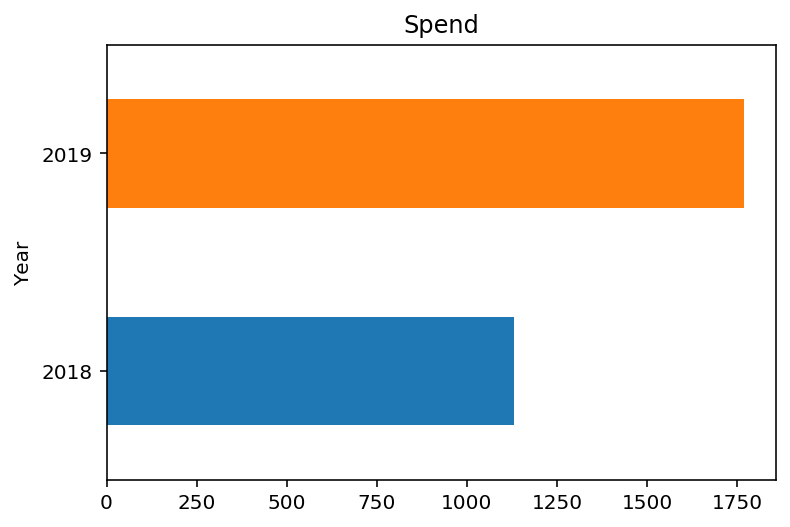

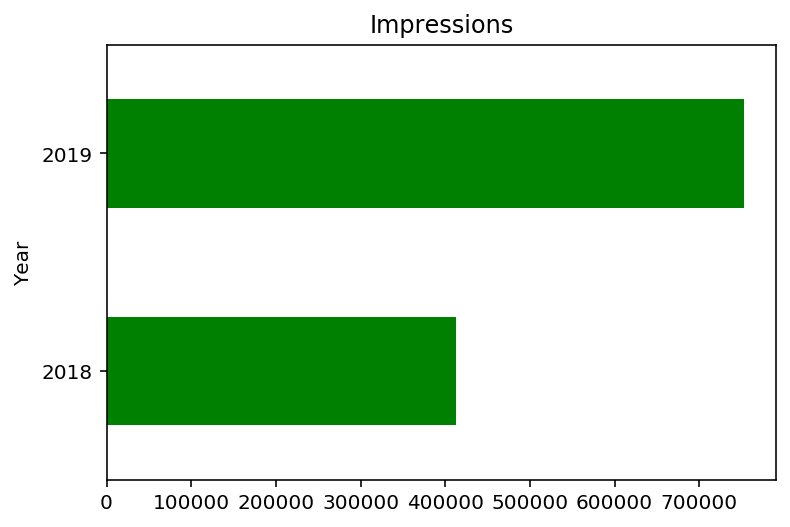

In [6]:
f1 = plt.figure(1)
g1 = ads.groupby('Year')['Spend'].apply(np.mean).plot(kind='barh', title='Spend')
f2 = plt.figure(2)
g2 = ads.groupby('Year')['Impressions'].apply(np.mean).plot(kind='barh', title='Impressions', color='G')
plt.show()

As we can see, not only the number of ads has increased, the average money spent and impressions' degree are all increased a lot from 2018 to 2019.

In [7]:
ads.groupby('OrganizationName')['Spend'].sum().sort_values(ascending=False).head(3)

OrganizationName
General Mills         1683056
Assembly               802843
Cossette Media Inc     554022
Name: Spend, dtype: int64

The organization that had the most amount of money to spend on ads given by advertisers was General Mills.

In [8]:
ads.groupby('OrganizationName')['ADID'].count().sort_values(ascending=False).head(3)

OrganizationName
UnRestrict Minnesota     311
Blueprint Interactive    248
The Aber Group           223
Name: ADID, dtype: int64

The organization that created the most amount of snapchat ads was UnRestrict Minnesota.

Does 2019 has more ads because there are more new companies or did original companies put out more ads?
Let's take a closer look at the OrganizationName column to check:
1. how many companies put ads for both years; 
2. how many companies put ads in 2019 but not in 2018;
3. which companies put most money and which companies put most ads for each year.

In [9]:
groups = ads.groupby('Year')['OrganizationName'] # get the groups
companies_2018 = (
    groups.get_group(2018)
    .value_counts().to_frame()
) # get the companies count of 2018
companies_2019 = (
    groups.get_group(2019)
    .value_counts().to_frame()
) # get the companies count of 2019
stats = {}
total = companies_2018.join(companies_2019, how='outer', lsuffix='_2018', rsuffix='_2019').fillna(0) # join two
total = total.assign(Difference=total['OrganizationName_2019'] - total['OrganizationName_2018']) # put the difference 

# companies in 2019 but not in 2018
new_comp = total.loc[(total['OrganizationName_2018'] == 0) & (total['OrganizationName_2019'] != 0)]

# companies in both years
both_comp = total.loc[(total['OrganizationName_2018'] != 0) & (total['OrganizationName_2019'] != 0)]

stats['increase_in_new'] = new_comp['Difference'].sum() # the increase caused by new companies
stats['increase_in_both'] = both_comp['Difference'].sum() # the increase casued by old companies

stats['increase_comp_num'] = new_comp.size # increase companies'number

stats['both_comp_num'] = both_comp.size #companies for both in 2018 and 2019

stats['highest_2018'] = companies_2018['OrganizationName'].idxmax() #the company which put most ads in 2018
stats['highest_2019'] = companies_2019['OrganizationName'].idxmax() #the company which put most ads in 2019

#number of companies who put ads in 2018 but not in 2019
stats['decrease_comp_num'] = total.loc[(total['OrganizationName_2018'] != 0) & (total['OrganizationName_2019'] == 0)].size
stats['increase_per_comp_new'] = stats['increase_in_new']/stats['increase_comp_num']
stats['increase_per_comp_both'] = stats['increase_in_both']/stats['both_comp_num']

# put all in a dataframe
stats_df = pd.Series(stats).to_frame()
stats_df = stats_df.rename(columns={0: 'stats'})
stats_df

,stats
increase_in_new,2625
increase_in_both,648
increase_comp_num,780
both_comp_num,93
highest_2018,Bully Pulpit Interactive
highest_2019,UnRestrict Minnesota
decrease_comp_num,222
increase_per_comp_new,3.36538
increase_per_comp_both,6.96774


1. The increase of ads are mainly caused by new companies.
2. The company who put most ads in 2018 is Bully Pulpit Interactive, and the The company who put most ads in 2019 is UnRestrict Minnesota
3. There are 684 new companies, while only 225 companies that put ads in 2018 quit in 2019

Another question: Are ads targeted more towards females or males?

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


([<matplotlib.axis.YTick at 0x7fd96e05abe0>,
 <a list of 2 Text yticklabel objects>)

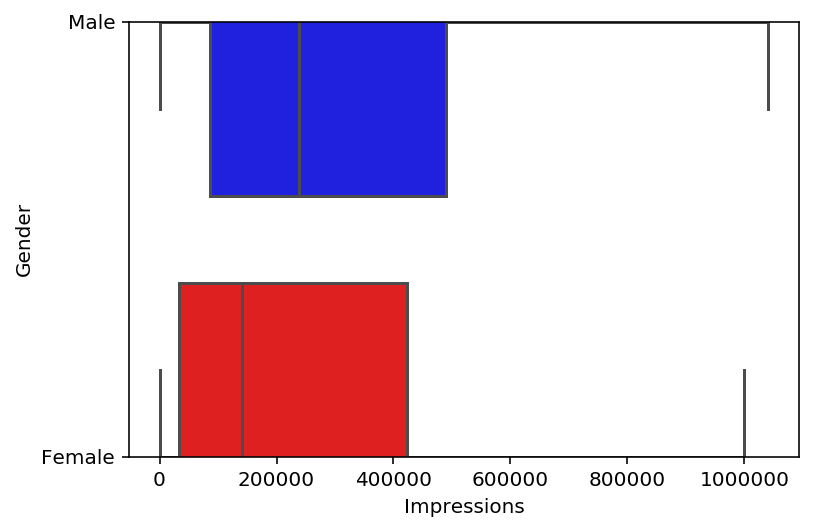

In [10]:
bivariate = ads[["Gender", "Impressions"]]
bivariate["Gender"] = bivariate["Gender"].fillna("BOTH") # Nan means for both genders

male_imp = bivariate[bivariate["Gender"] == "MALE"].set_index("Gender") # 92 rows
female_imp = bivariate[bivariate["Gender"] == "FEMALE"].set_index("Gender") # 293 rows

gend_imp = [male_imp.values, female_imp.values]

my_pal = {0: "b", 1: "r"}
plot = sns.boxplot(data = gend_imp, orient = "h", showfliers=False, palette=my_pal)
plot.set(xlabel='Impressions',ylabel='Gender')
plt.yticks(plt.yticks()[0], ["Male", "Female"])

### Assessment of Missingness

Let's see if Segments is MAR dependent on Spend.
For the sake of ease, assume a significance level of a = 0.01

In [11]:
props = {}
#Iterate through columns
for col in ads.columns:
    #Find the total length of the column
    tot = len(ads[col])
    #Find the number of non-null values
    non_null = len(ads[col].dropna())
    #Calculate the proportion of non-nulls & put it in a dic for later use
    props[col] = (non_null / tot)
props
#This is the proportion of non-null values for each column

{'ADID': 1.0,
 'CreativeUrl': 1.0,
 'Currency Code': 1.0,
 'Spend': 1.0,
 'Impressions': 1.0,
 'StartDate': 1.0,
 'EndDate': 0.8179475164011246,
 'OrganizationName': 1.0,
 'BillingAddress': 1.0,
 'CandidateBallotInformation': 0.13355201499531397,
 'PayingAdvertiserName': 1.0,
 'Gender': 0.09020618556701031,
 'AgeBracket': 0.9172914714151827,
 'CountryCode': 1.0,
 'Regions (Included)': 0.2757731958762887,
 'Regions (Excluded)': 0.010543580131208997,
 'Electoral Districts (Included)': 0.015229615745079663,
 'Electoral Districts (Excluded)': 0.0,
 'Radius Targeting (Included)': 0.07169634489222118,
 'Radius Targeting (Excluded)': 0.0028116213683223993,
 'Metros (Included)': 0.041237113402061855,
 'Metros (Excluded)': 0.003983130271790066,
 'Postal Codes (Included)': 0.19751640112464855,
 'Postal Codes (Excluded)': 0.027413308341143392,
 'Location Categories (Included)': 0.0037488284910965324,
 'Location Categories (Excluded)': 0.00046860356138706655,
 'Interests': 0.2563261480787254,
 'Os

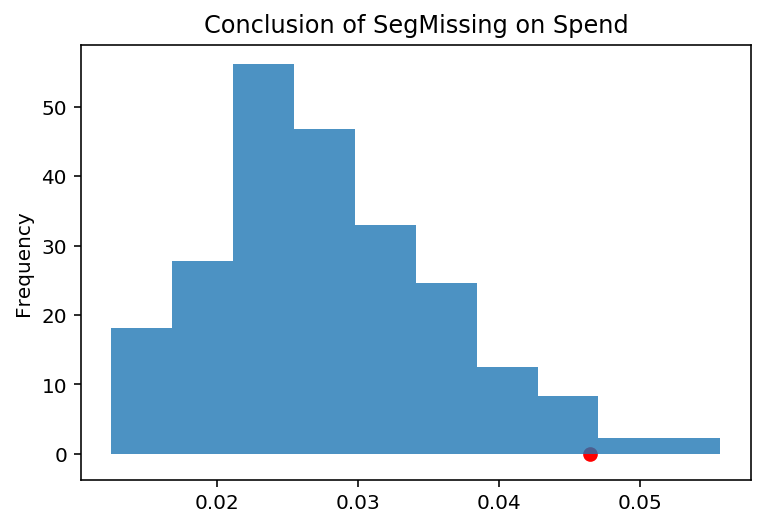

In [12]:
# This makes a column with booleans corresponding to the missingess of Segments, True if nan. I also select only 
#columns that will be used in the test, reducing the compuational load. This will be done for all subsequent tests
mdf = ads.assign(**{"SegMissing": ads["Segments"].isnull()})[["Spend", "SegMissing"]]
#Calculate the observed ks
obsks, _ = ks_2samp(
    mdf.loc[mdf['SegMissing'], 'Spend'],
    mdf.loc[~mdf['SegMissing'], 'Spend']
)
n_repetitions = 500
kslist = []
for _ in range(n_repetitions):
    
    # shuffle the Spend
    shuffled_spend = (
        mdf['Spend']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    # Throw it into a df
    shuffled = (
        mdf
        .assign(**{'ShuffledSpend': shuffled_spend})
    )
    #compute test stat
    ks, _ = ks_2samp(
        shuffled.loc[shuffled['SegMissing'], 'ShuffledSpend'],
        shuffled.loc[~shuffled['SegMissing'], 'ShuffledSpend']
    )
    # add it to the list of results
    kslist.append(ks)
#Visualize the results
pd.Series(kslist).plot(kind='hist', density=True, alpha=0.8, title = "Conclusion of SegMissing on Spend")
plt.scatter(obsks, 0, color='red', s=40);

This permutation test tells us that segments are MAR dependent on Spend. Next, we will use the difference of means to determine whether Segments is MAR dependent on Impression.

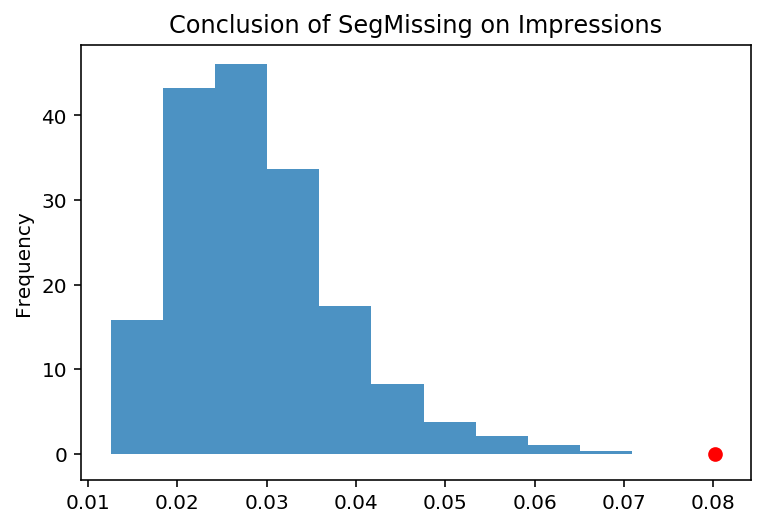

In [13]:
mdf = ads.assign(**{"SegMissing": ads["Segments"].isnull()})[["Impressions", "SegMissing"]]
#Calculate the observed ks
obsks, _ = ks_2samp(
    mdf.loc[mdf['SegMissing'], 'Impressions'],
    mdf.loc[~mdf['SegMissing'], 'Impressions']
)
n_repetitions = 500
kslist = []
for _ in range(n_repetitions):
    
    # shuffle the Impressions
    shuffled_imp = (
        mdf['Impressions']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # Throw it into a df
    shuffled = (
        mdf
        .assign(**{'ShuffledImpressions': shuffled_imp})
    )
    #compute test stat
    ks, _ = ks_2samp(
        shuffled.loc[shuffled['SegMissing'], 'ShuffledImpressions'],
        shuffled.loc[~shuffled['SegMissing'], 'ShuffledImpressions']
    )
    # add it to the list of results
    kslist.append(ks)
#Visualize the results
pd.Series(kslist).plot(kind='hist', density=True, alpha=0.8, title = "Conclusion of SegMissing on Impressions")
plt.scatter(obsks, 0, color='red', s=40);

This tells us that segments are MAR dependent on Impressions.

### Hypothesis Test

For the sake of ease, assume a significance level of a = 0.01

For our hypothesis test, we are looking within the US across years to determine whether or not the cost of spending per view varies between midterm election years versus nonelection years. In this case, the null hypothesis is that these observations (ad spends) are drawn from the same distribution. The alternative, that they are not.

In [16]:
ads = ads.assign(**{"Country": ads['BillingAddress'].apply(lambda x: x[-2:])})

ads = ads.assign(**{"Country": ads["CountryCode"].apply(lambda x: pycountry.countries.get(alpha_2=x).name.lower())})
#This line turns the country code (ie US) to the lower case name of the associated country (ie united states)

us_df = ads.query("Country == 'US'")
#Limit the dataframe to the US
us_df = us_df.assign(**{"ElectionYear":us_df["Year"].apply(lambda x: True if x == 18 else False)})
#Assign booleans to whether or not it was a national election year

NameError: name 'pycountry' is not defined